In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
path = "/content/WA_Fn-UseC_-HR-Employee-Attrition.csv"
df = pd.read_csv(path)


In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
# checking for null data
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Visualization

In [6]:
age_att=df.groupby(['Age','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(age_att,x='Age',y='Counts',color='Attrition',title='Agewise Counts of People in an Organization')

In [7]:
rate_att=df.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
rate_att['MonthlyIncome']=round(rate_att['MonthlyIncome'],-3)
rate_att=rate_att.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
fig=px.line(rate_att,x='MonthlyIncome',y='Counts',color='Attrition',title='Monthly Income basis counts of People in an Organization')
fig.show()

In [8]:
dept_att=df.groupby(['Department','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
fig=px.bar(dept_att,x='Department',y='Counts',color='Attrition',title='Department wise Counts of People in an Organization')
fig.show()

In [9]:
sats_att=df.groupby(['EnvironmentSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(sats_att,x='EnvironmentSatisfaction',y='Counts',color='Attrition',title='Environment Satisfaction level Counts of People in an Organization')

In [10]:
jsats_att=df.groupby(['JobSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(jsats_att,x='JobSatisfaction',y='Counts',color='Attrition',title='Job Satisfaction level Counts of People in an Organization')

In [11]:
stock_att=df.groupby(['StockOptionLevel','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.bar(stock_att,x='StockOptionLevel',y='Counts',color='Attrition',title='Stock facilities level wise People in an Organization')

In [12]:
wlb_att=df.groupby(['WorkLifeBalance','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.bar(wlb_att,x='WorkLifeBalance',y='Counts',color='Attrition',title='Work Life Balance level Counts of People in an Organization')

In [13]:
ncwrd_att=df.groupby(['NumCompaniesWorked','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(ncwrd_att,x='NumCompaniesWorked',y='Counts',color='Attrition',title='Work Experience level Counts of People in an Organization')

In [14]:
yrscr_att=df.groupby(['YearsInCurrentRole','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(yrscr_att,x='YearsInCurrentRole',y='Counts',color='Attrition',title='Counts of People working for years in an Organization')

In [15]:
hike_att=df.groupby(['PercentSalaryHike','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(hike_att,x='PercentSalaryHike',y='Counts',color='Attrition',title='Count of Hike Percentages people receive in an Organization')

In [16]:
man_att=df.groupby(['YearsWithCurrManager','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(man_att,x='YearsWithCurrManager',y='Counts',color='Attrition',title='Count of people spending years with a Manager in an Organization')

# Data preprocessing

In [17]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [18]:
#dropping values which has one value and employee number
df = df.drop(['StandardHours','Over18','EmployeeCount','EmployeeNumber'],axis = 1)

In [19]:
# checking the balance of dataset since its a binary classification
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [20]:
yes_df = df.loc[df['Attrition'] == 'Yes']
no_df = df.loc[df['Attrition'] == 'No'][0:237]

balanced_df = pd.concat([yes_df, no_df])

new_df = balanced_df.sample(frac = 1, random_state = 42)

new_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
227,29,No,Travel_Frequently,1413,Sales,1,1,Medical,2,Female,...,3,4,1,11,5,3,11,10,4,1
243,40,No,Travel_Rarely,1300,Research & Development,24,2,Technical Degree,1,Male,...,3,1,2,9,3,3,9,8,4,7
42,26,Yes,Travel_Rarely,1357,Research & Development,25,3,Life Sciences,1,Male,...,3,3,0,1,2,2,1,0,0,1
275,37,No,Non-Travel,728,Research & Development,1,4,Medical,1,Female,...,3,1,2,15,2,3,5,2,0,2
239,32,Yes,Travel_Rarely,515,Research & Development,1,3,Life Sciences,4,Male,...,3,4,0,4,2,1,3,2,1,2


In [21]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [22]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
category_df = df[['Attrition','Department','EducationField','Gender','BusinessTravel','JobRole','MaritalStatus','OverTime']]
category = category_df.apply(le.fit_transform)
df.drop(['Attrition','Department','EducationField','Gender','JobRole','BusinessTravel','MaritalStatus','OverTime'],inplace=True,axis=1)
concate_df = pd.concat([df,category],axis=1)

In [23]:
concate_df

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Department,EducationField,Gender,BusinessTravel,JobRole,MaritalStatus,OverTime
0,41,1102,1,2,2,94,3,2,4,5993,...,0,5,1,2,1,0,2,7,2,1
1,49,279,8,1,3,61,2,2,2,5130,...,1,7,0,1,1,1,1,6,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,1,1,4,1,2,2,2,1
3,33,1392,3,4,4,56,3,1,3,2909,...,3,0,0,1,1,0,1,6,1,1
4,27,591,2,1,1,40,3,1,2,3468,...,2,2,0,1,3,1,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,0,3,0,1,3,1,1,2,1,0
1466,39,613,6,1,4,42,2,3,1,9991,...,1,7,0,1,3,1,2,0,1,0
1467,27,155,4,3,2,87,4,2,2,6142,...,0,3,0,1,1,1,2,4,1,1
1468,49,1023,2,3,4,63,2,2,2,5390,...,0,8,0,2,3,1,1,7,1,0


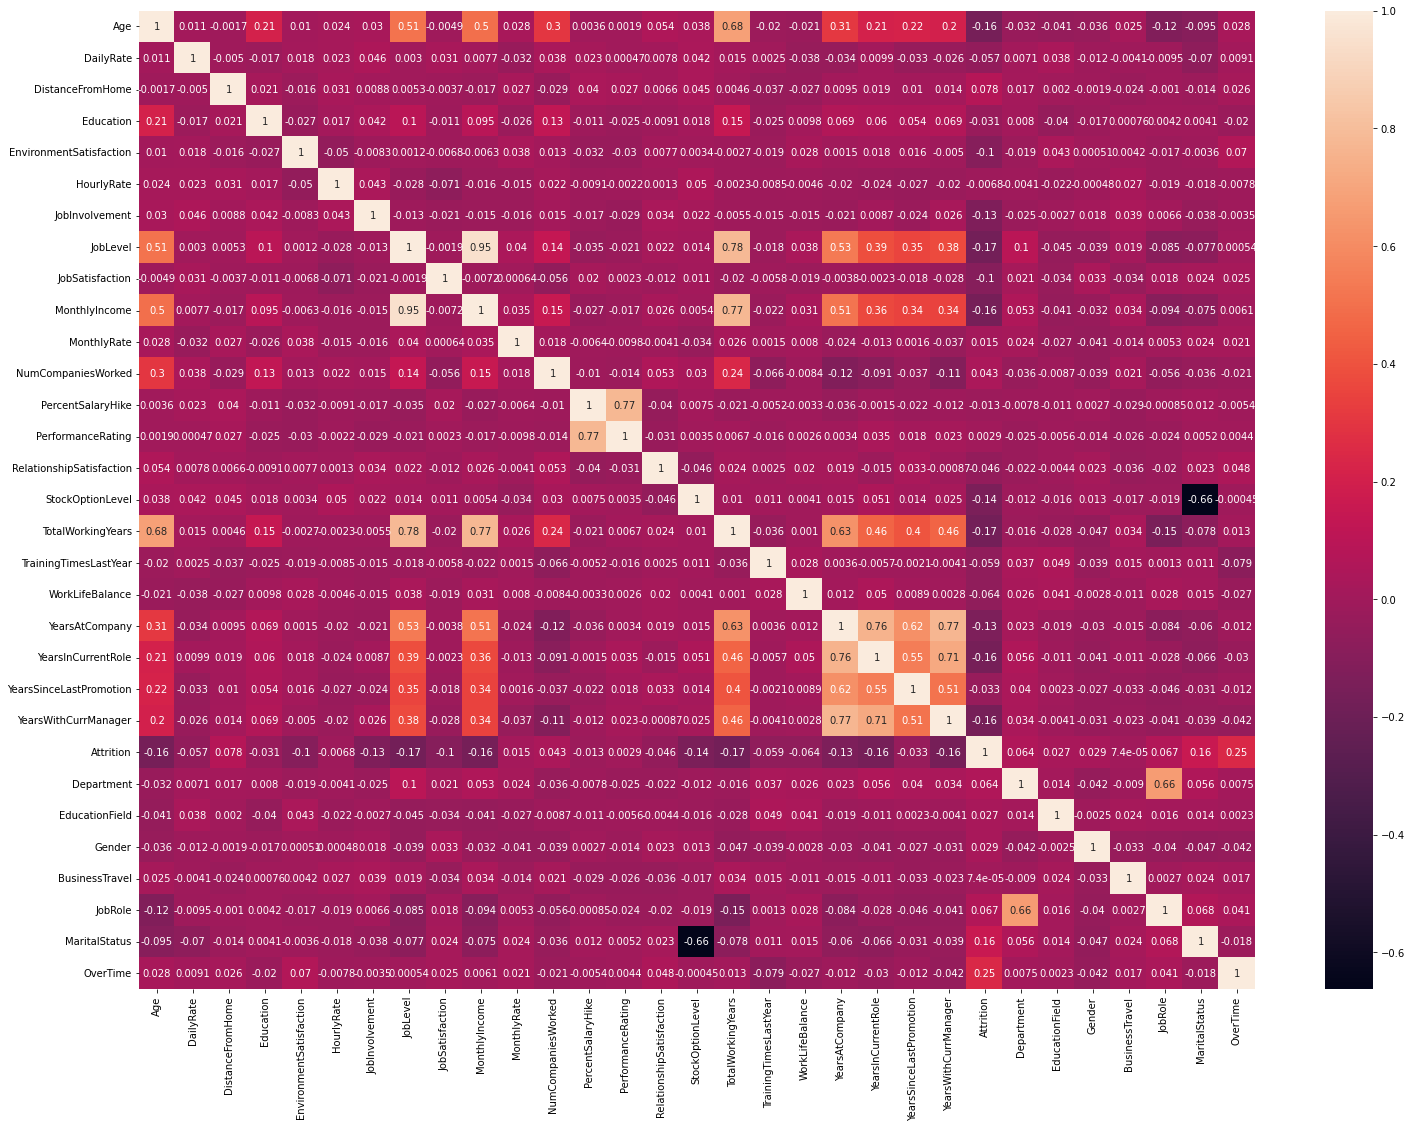

In [24]:
# checking the correlation of features
plt.figure(figsize=(25,18))
sns.heatmap(concate_df.corr(),annot=True)

# Data splitting

In [25]:
# splitting X and y variable
X =concate_df.drop(['Attrition'],axis=1)
y = concate_df['Attrition']

In [26]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [28]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(X)
x_normalized

array([[0.54761905, 0.71581961, 0.        , ..., 0.875     , 1.        ,
        1.        ],
       [0.73809524, 0.12670007, 0.25      , ..., 0.75      , 0.5       ,
        0.        ],
       [0.45238095, 0.90980673, 0.03571429, ..., 0.25      , 1.        ,
        1.        ],
       ...,
       [0.21428571, 0.03793844, 0.10714286, ..., 0.5       , 0.5       ,
        1.        ],
       [0.73809524, 0.65926986, 0.03571429, ..., 0.875     , 0.5       ,
        0.        ],
       [0.38095238, 0.37652112, 0.25      , ..., 0.25      , 0.5       ,
        0.        ]])

# Model

In [29]:
#Decision tree

x = x_normalized
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [30]:
model_dt = DecisionTreeClassifier(max_depth=4, random_state=1,criterion ='gini')
model_dt.fit(x_train,y_train)
model_dt_score_train = model_dt.score(x_train, y_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",model_dt_score_test)

y_pred_dt = model_dt.predict_proba(x_test)[:, 1]

Training score:  0.8853255587949466
Testing score:  0.81859410430839


In [31]:
#performance metrics
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

predictions = model_dt.predict(x_test)
y_pred_gini = model_dt.predict(x_test)
print("Accuracy score",accuracy_score(y_test,y_pred_gini))

Accuracy score 0.81859410430839


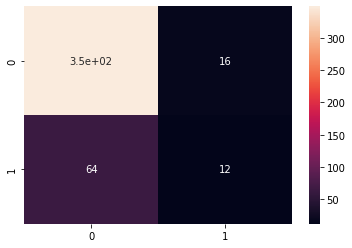

In [32]:
cm = confusion_matrix(y_test, y_pred_gini)
sns.heatmap(cm, annot=True)
plt.show()

In [33]:
print(classification_report(y_test,y_pred_gini))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       365
           1       0.43      0.16      0.23        76

    accuracy                           0.82       441
   macro avg       0.64      0.56      0.56       441
weighted avg       0.77      0.82      0.78       441



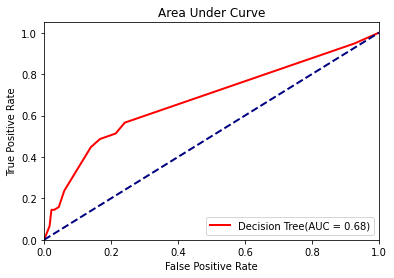

In [34]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='red',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

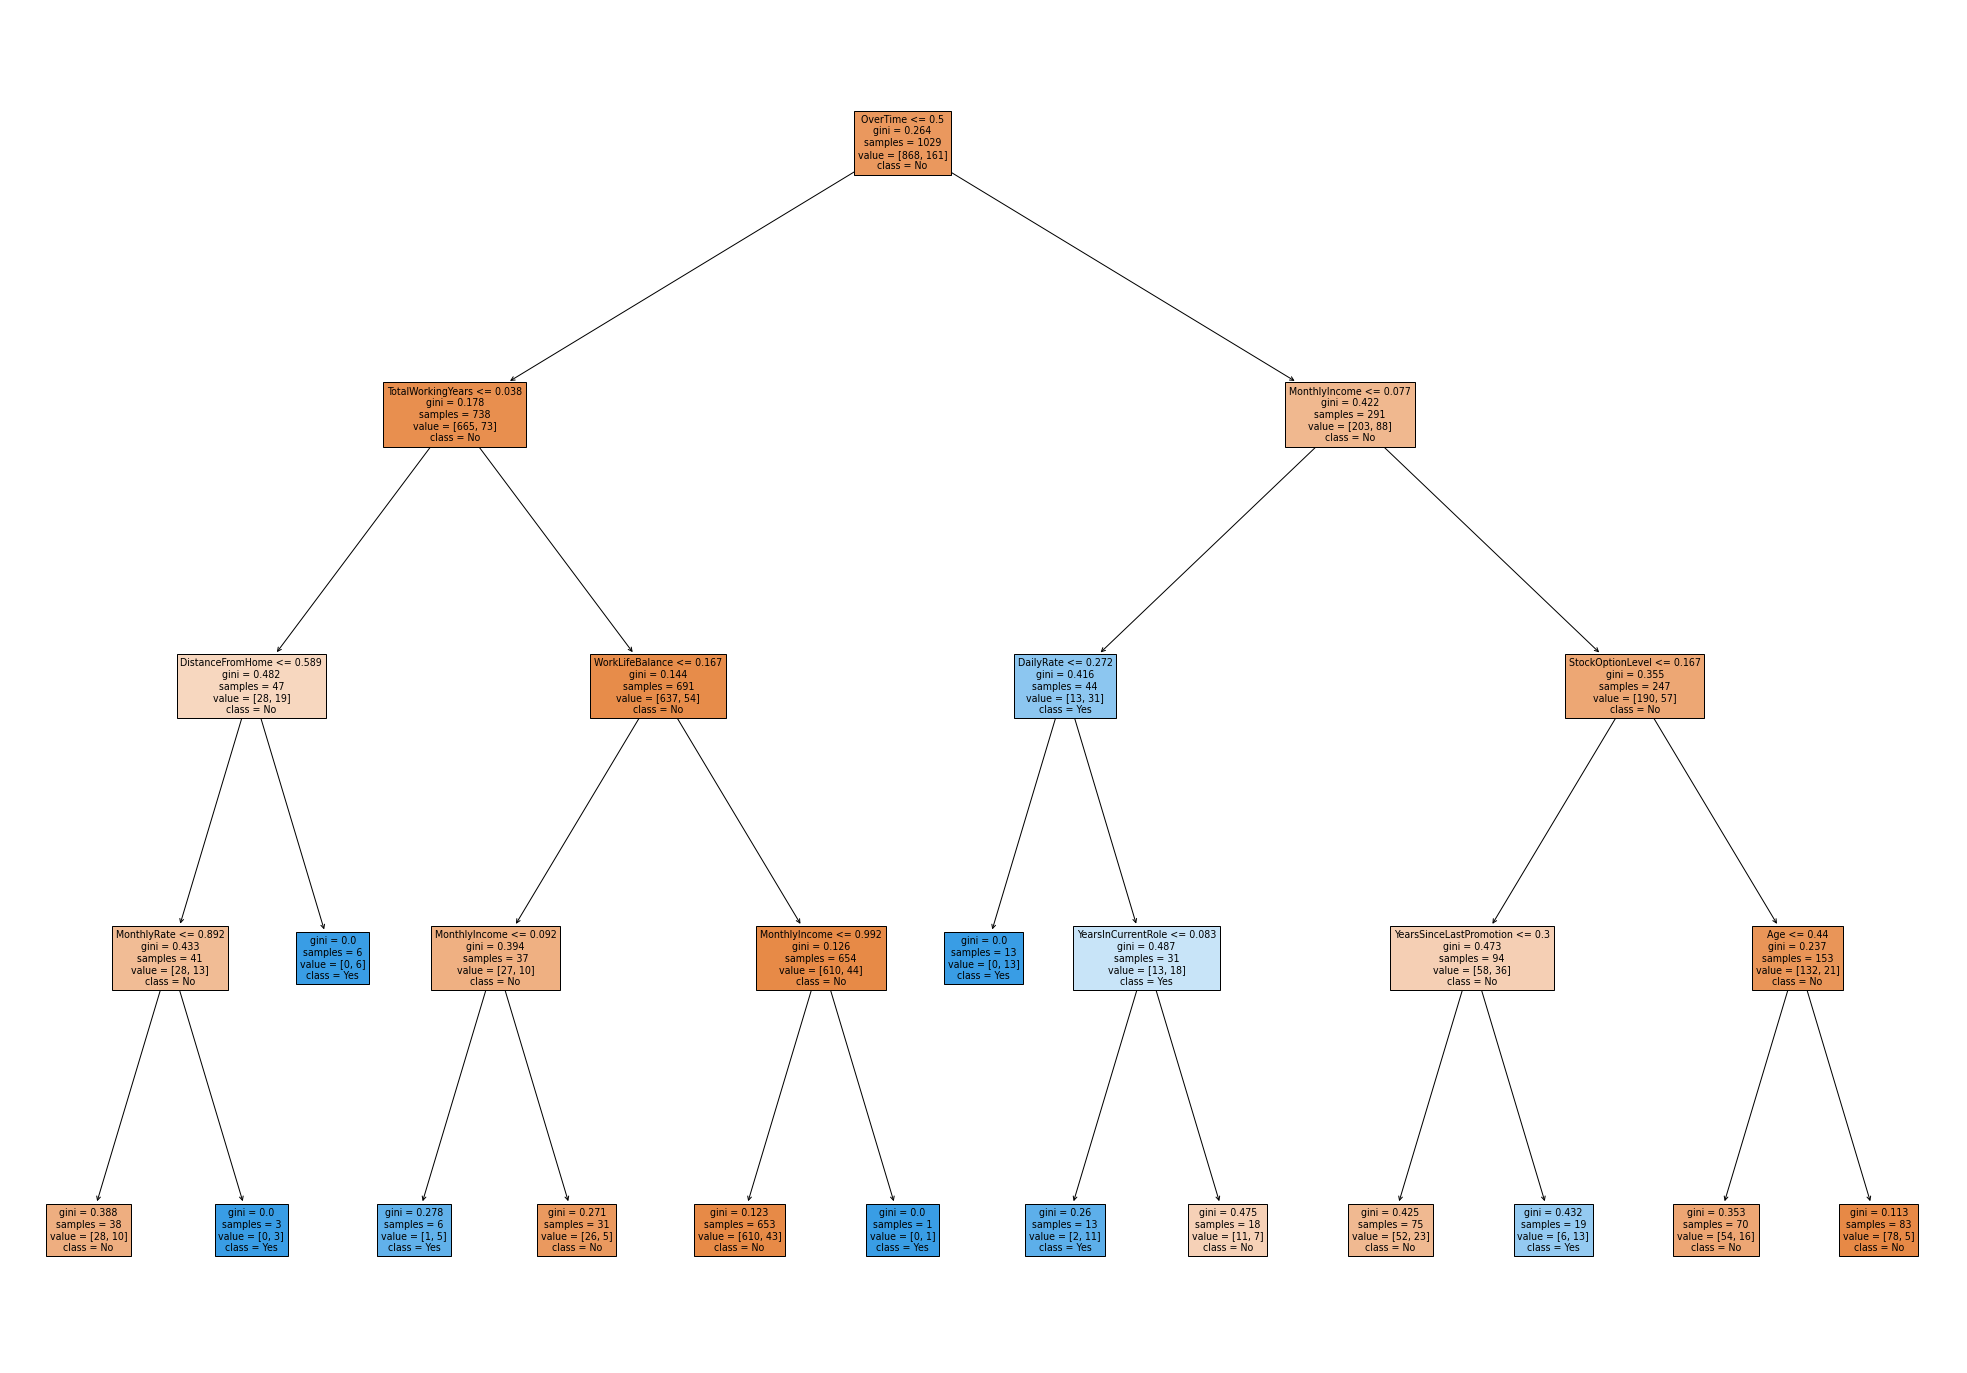

In [35]:
# Tree strucutre for our decision tree model
from sklearn import tree
fig = plt.figure(figsize=(35,25))
plotting = tree.plot_tree(model_dt,
                   feature_names=X.columns,
                   class_names=['No', "Yes"],
                   filled=True)
fig.savefig('decisiontree.png')


In [36]:
# generating the importances of features used by Decision Tree
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(model_dt.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
9,MonthlyIncome,0.287
29,OverTime,0.215
16,TotalWorkingYears,0.116
15,StockOptionLevel,0.087
2,DistanceFromHome,0.061
21,YearsSinceLastPromotion,0.054
1,DailyRate,0.040
20,YearsInCurrentRole,0.039
10,MonthlyRate,0.038
18,WorkLifeBalance,0.036


# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [38]:
X_train_lg, X_test_lg, y_train_lg, y_test_lg = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [39]:
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train_lg,y_train_lg)

LogisticRegression()

In [40]:
y_pred_lg =logreg.predict(X_test_lg)

In [41]:
cnf_matrix = metrics.confusion_matrix(y_test_lg, y_pred_lg)
cnf_matrix

array([[366,   5],
       [ 48,  22]])

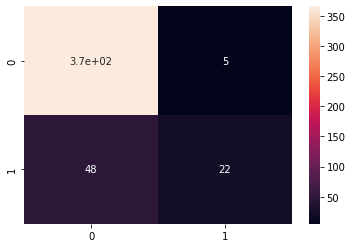

In [42]:
cm = confusion_matrix(y_test_lg, y_pred_lg)
sns.heatmap(cm, annot=True )
plt.show()

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test_lg, y_pred_lg))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       371
           1       0.81      0.31      0.45        70

    accuracy                           0.88       441
   macro avg       0.85      0.65      0.69       441
weighted avg       0.87      0.88      0.86       441



In [44]:
accuracy_logreg = accuracy_score(y_test_lg,y_pred_lg)
print("Accuracy:",accuracy_logreg)
print("Precision:",metrics.precision_score(y_test_lg, y_pred_lg))
print("Recall:",metrics.recall_score(y_test_lg, y_pred_lg))

Accuracy: 0.8798185941043084
Precision: 0.8148148148148148
Recall: 0.3142857142857143


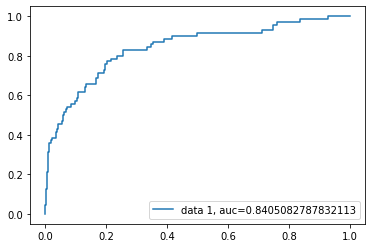

In [45]:
y_pred_proba_lg = logreg.predict_proba(X_test_lg)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_lg,  y_pred_proba_lg)
auc = metrics.roc_auc_score(y_test_lg, y_pred_proba_lg)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# SVM

In [46]:
from sklearn.model_selection import train_test_split

X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [47]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train_svm,y_train_svm)


# make predictions on test set
y_pred=svc.predict(X_test_svm)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test_svm, y_pred)))

Model accuracy score with default hyperparameters: 0.8639


In [48]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

y_pred_test = svc.predict(X_test_svm)
cm = confusion_matrix(y_test_svm, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[368   3]
 [ 57  13]]

True Positives(TP) =  368

True Negatives(TN) =  13

False Positives(FP) =  3

False Negatives(FN) =  57


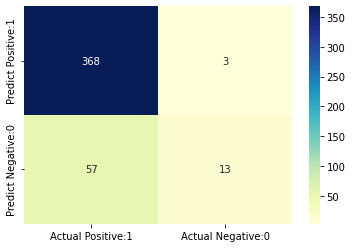

In [49]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test_svm, y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       371
           1       0.81      0.19      0.30        70

    accuracy                           0.86       441
   macro avg       0.84      0.59      0.61       441
weighted avg       0.86      0.86      0.83       441



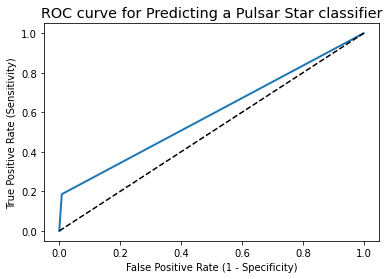

In [51]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_svm, y_pred_test)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [52]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test_svm, y_pred_test)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.5888
